# Exploring the Frequency Content of Askaryan Pulses

In this example we explore how the freqeuncy spectrum of an Askaryan pulse changes as a function of the off-cone angle (i.e. the angular distance between the Cherenkov angle and the observation angle).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyrex

First, set up a neutrino source and find the index of refraction at its depth. Then use that index of refraction to calculate the Cherenkov angle.

In [2]:
source = pyrex.Particle("nu_e", vertex=(0, 0, -1000), direction=(0, 0, -1),
                        energy=1e8)
n = pyrex.IceModel.index(source.vertex[2])
print("Index:", n)
ch_angle = np.arccos(1/n)
print("Cherenkov angle:", np.degrees(ch_angle))

Index: 1.7799992042414852
Cherenkov angle: 55.819766880820666


Now, for a range of $\Delta\theta$s, generate an Askaryan pulse $\Delta\theta$ away from the Chereknov angle and plot its frequency spectrum.

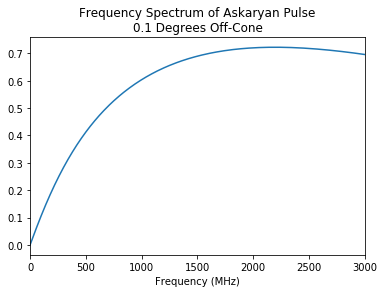

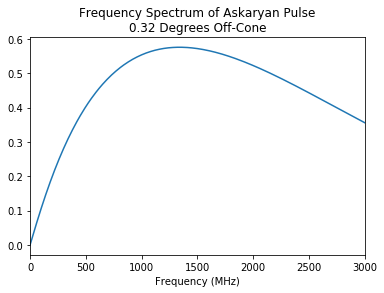

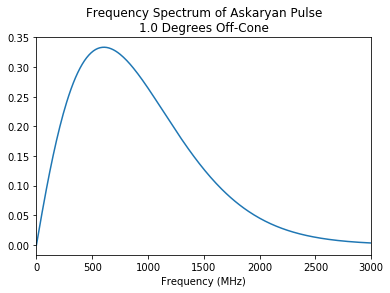

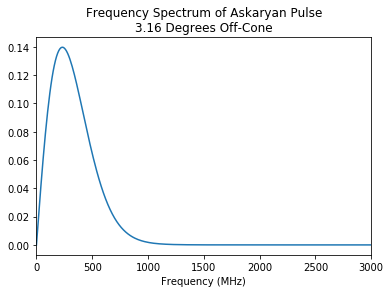

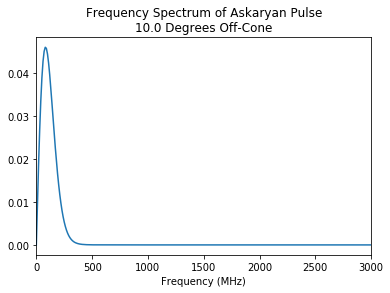

In [3]:
for dtheta in np.radians(np.logspace(-1, 1, 5)):
    n_pts = 10001
    pulse = pyrex.AskaryanSignal(times=np.linspace(-20e-9, 80e-9, n_pts),
                                 particle=source,
                                 viewing_angle=ch_angle-dtheta,
                                 viewing_distance=1000)
    plt.plot(pulse.frequencies[:int(n_pts/2)] * 1e-6, # Convert from Hz to MHz
             np.abs(pulse.spectrum)[:int(n_pts/2)])
    plt.title("Frequency Spectrum of Askaryan Pulse\n"+
              str(round(np.degrees(dtheta),2))+" Degrees Off-Cone")
    plt.xlabel("Frequency (MHz)")
    plt.xlim(0, 3000)
    plt.show()

Actually, we probably really want to see the frequency content after the signal has propagated through the ice a bit. So first set up the ray tracer from our neutrino source to some other point where our antenna might be (and make sure a path between those two points exists).

In [4]:
rt = pyrex.RayTracer(from_point=source.vertex, to_point=(500, 0, -100))
print(rt.exists)

True


Finally, plot the signal spectrum as it appears at the antenna position by propagating it along the (first solution) path.

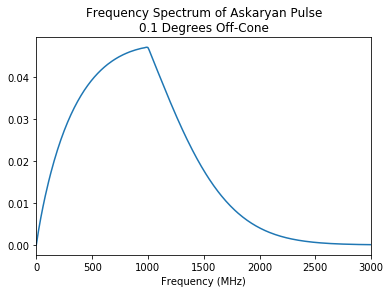

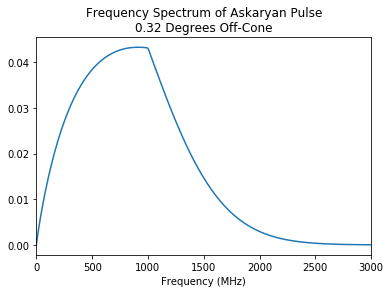

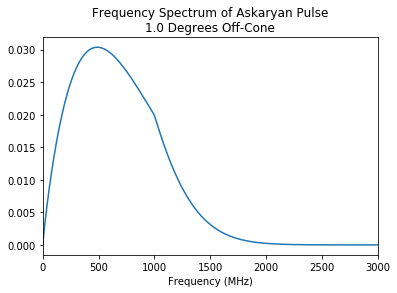

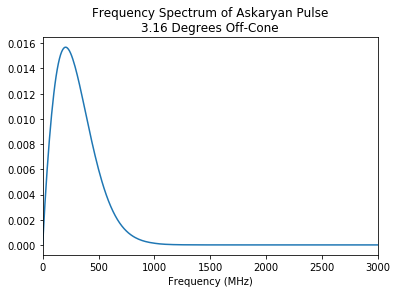

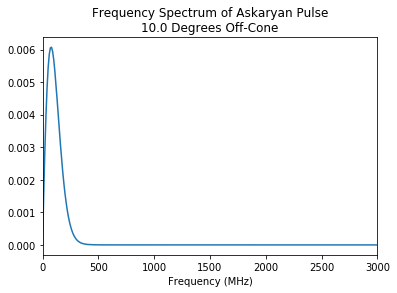

In [5]:
path = rt.solutions[0]
for dtheta in np.radians(np.logspace(-1, 1, 5)):
    n_pts = 2048
    pulse = pyrex.AskaryanSignal(times=np.linspace(-20e-9, 80e-9, n_pts),
                                 particle=source,
                                 viewing_angle=ch_angle-dtheta,
                                 viewing_distance=path.path_length)
    path.propagate(pulse)
    plt.plot(pulse.frequencies[:int(n_pts/2)] * 1e-6, # Convert from Hz to MHz
             np.abs(pulse.spectrum)[:int(n_pts/2)])
    plt.title("Frequency Spectrum of Askaryan Pulse\n"+
              str(round(np.degrees(dtheta),2))+" Degrees Off-Cone")
    plt.xlabel("Frequency (MHz)")
    plt.xlim(0, 3000)
    plt.show()

You may notice the sharp cutoff in the frequency spectrum above 1 GHz. This is due to the ice model, which defines the attenuation length in a piecewise manner for frequencies above or below 1 GHz.